In [26]:
#import libraries
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#import the data set 
df = pd.read_csv('orders.csv')
df.head()

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders
0,2019-07-02,40065,7501,23,Суши,54.0,1.0
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0
4,2019-09-21,43919,30984,25,Суши,6.0,0.0


In [28]:
#Display basic statistics.
print(df.describe())
#Check data types and missing values. 
print(df.info())



          vendor_id      chain_id       city_id  successful_orders  \
count  96118.000000  96118.000000  96118.000000       96118.000000   
mean   47425.345867  31031.897074     24.357342           8.877401   
std    15447.399597  10669.949918      1.168019          15.370105   
min     3756.000000    804.000000     23.000000           0.000000   
25%    40265.000000  27909.000000     23.000000           1.000000   
50%    49754.000000  32662.000000     24.000000           4.000000   
75%    58052.000000  38376.000000     25.000000           9.000000   
max    76557.000000  47907.000000     26.000000         240.000000   

        fail_orders  
count  96118.000000  
mean       0.416842  
std        1.424931  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       86.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96118 entries, 0 to 96117
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------    

In [29]:
#Check for missing values
null_values=df.isnull() 
null_count = df.isnull().sum()
print(null_count)



date                   0
vendor_id              0
chain_id               0
city_id                0
spec                 385
successful_orders      0
fail_orders            0
dtype: int64


In [30]:
#fill the missing (null) values in the spec column with the word 'други специјалитети' 
df= df.fillna('други специјалитети') 
len(df)

96118

In [31]:
#Remouve duplicates 
df.drop_duplicates(inplace=True)

In [32]:
#Convert data type 
df['date'] =pd.to_datetime(df['date'],format='%Y-%m-%d')
print(df.head())

df.dtypes

        date  vendor_id  chain_id  city_id     spec  successful_orders  \
0 2019-07-02      40065      7501       23     Суши               54.0   
1 2019-08-27      48058     33226       23   Шаурма                0.0   
2 2019-09-25      35430     26220       25    Пицца                2.0   
3 2019-09-21      56553     38601       23  Шашлыки                1.0   
4 2019-09-21      43919     30984       25     Суши                6.0   

   fail_orders  
0          1.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  


date                 datetime64[ns]
vendor_id                     int64
chain_id                      int64
city_id                       int64
spec                         object
successful_orders           float64
fail_orders                 float64
dtype: object

In [33]:
#search for outliers 
columns_to_plot=['fail_orders' ,'successful_orders']
df[columns_to_plot].boxplot()

<Axes: >

In [34]:
df['total_orders'] = df['successful_orders'] + df['fail_orders']
df['success_rate'] = (df['successful_orders'] / df['total_orders'])*100
df['success_rate'] = df['success_rate'].fillna(0)

df['success_rate']=df['success_rate'].map('{:.2f}%'.format)
df.head(100)




,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders,total_orders,success_rate
0,2019-07-02,40065,7501,23,Суши,54.0,1.0,55.0,98.18%
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0,0.0,0.00%
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0,2.0,100.00%
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0,1.0,100.00%
4,2019-09-21,43919,30984,25,Суши,6.0,0.0,6.0,100.00%
...,...,...,...,...,...,...,...,...,...
95,2019-07-17,31644,22896,23,Пицца,9.0,0.0,9.0,100.00%
96,2019-07-28,52681,36017,23,Суши,0.0,0.0,0.0,0.00%
97,2019-09-30,14180,8791,26,Шашлыки,1.0,1.0,2.0,50.00%
98,2019-09-16,53000,36208,23,Итальянская,1.0,0.0,1.0,100.00%


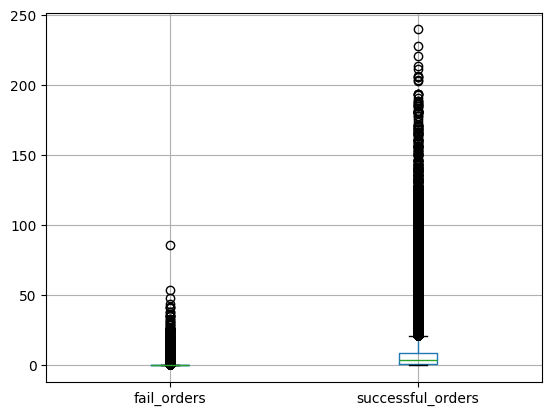

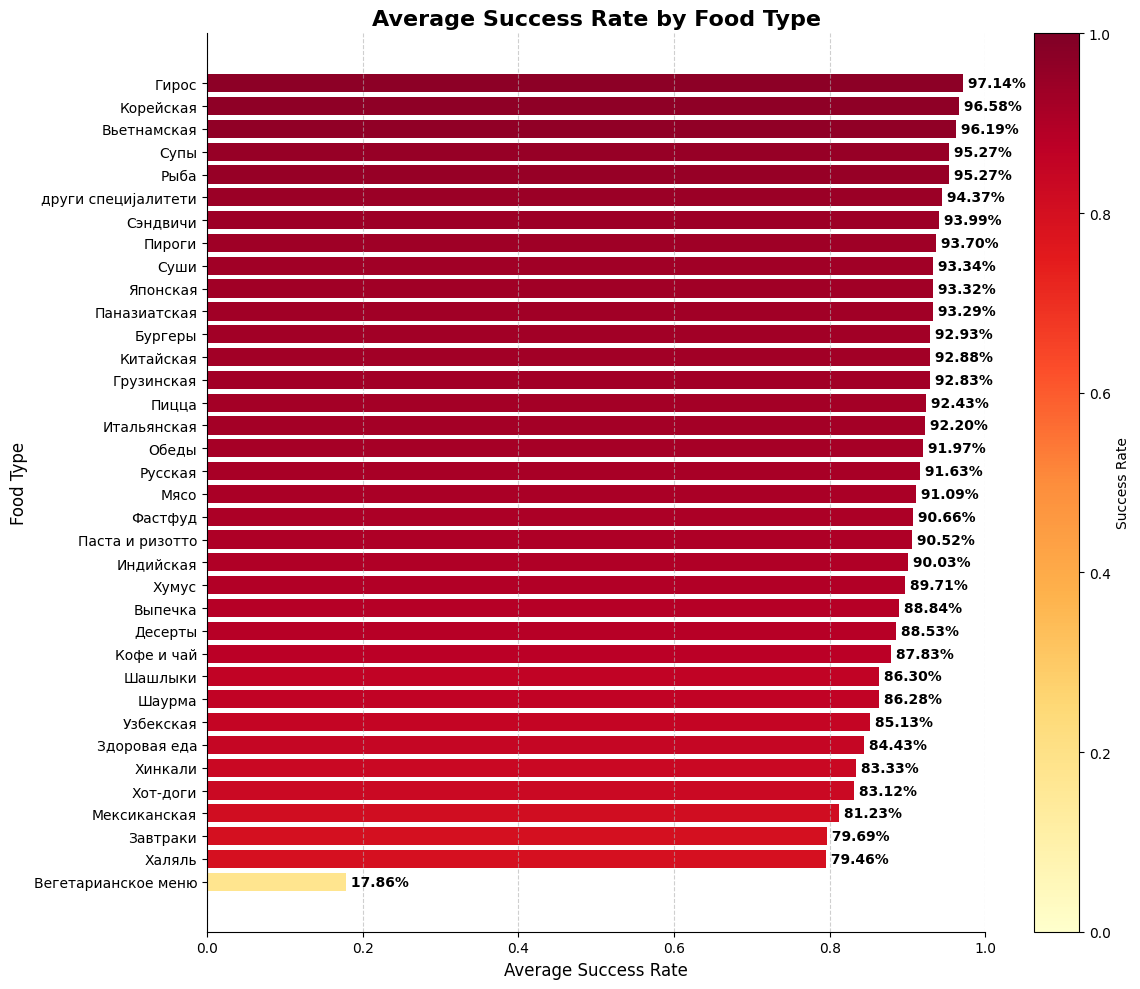

In [35]:
# Convert success_rate to numeric, removing the % sign
df['success_rate'] = df['success_rate'].str.rstrip('%').astype('float') / 100.0

# Group by spec and calculate mean success rate
grouped = df.groupby('spec')['success_rate'].mean().sort_values(ascending=True)

# Create a color palette
colors = plt.cm.YlOrRd(grouped.values)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Create a horizontal bar plot
bars = ax.barh(grouped.index, grouped.values, color=colors)

# Customize the plot
ax.set_title('Average Success Rate by Food Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Average Success Rate', fontsize=12)
ax.set_ylabel('Food Type', fontsize=12)
ax.set_xlim(0, 1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Success Rate', fontsize=10)

# Add value labels on the bars
for i, v in enumerate(grouped.values):
    ax.text(v, i, f' {v:.2%}', va='center', fontweight='bold')

# Add a subtle grid
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [36]:
df['total_orders'] = df['successful_orders'] + df['fail_orders']
order_volume = df.groupby('chain_id')['total_orders'].sum().sort_values(ascending=False)


In [37]:
# Monthly performance  Higher order volumes   

df['month'] = df['date'].dt.month
monthly_performance = df.groupby('month')['success_rate'].mean()

print(monthly_performance) 

month
6    0.922673
7    0.917714
8    0.914222
9    0.914280
Name: success_rate, dtype: float64


In [38]:
city_performance = df.groupby('city_id')['success_rate'].mean().sort_values(ascending=False)

print(city_performance)  

city_id
23    0.924284
25    0.924277
26    0.906474
24    0.905869
Name: success_rate, dtype: float64


In [39]:
df['failure_rate'] = df['fail_orders'] / df['total_orders']
failure_analysis = df.groupby('spec')['failure_rate'].mean().sort_values(ascending=False)

print(failure_analysis) 

spec
Вегетарианское меню    0.814815
Завтраки               0.176915
Халяль                 0.175926
Хинкали                0.166667
Здоровая еда           0.148235
Хот-доги               0.147517
Мексиканская           0.137457
Узбекская              0.136632
Шаурма                 0.128586
Шашлыки                0.120082
Десерты                0.098717
Выпечка                0.095081
Кофе и чай             0.091591
Индийская              0.085602
Паста и ризотто        0.085379
Мясо                   0.080581
Фастфуд                0.076718
Хумус                  0.075758
Обеды                  0.074381
Русская                0.070782
Итальянская            0.066679
Бургеры                0.065532
Паназиатская           0.063521
Пицца                  0.063204
Китайская              0.058899
Японская               0.055450
Грузинская             0.055224
Суши                   0.053980
Сэндвичи               0.053318
други специјалитети    0.048849
Пироги                 0.048721
Суп

In [40]:
diversity_score = df.groupby('chain_id')['spec'].nunique().sort_values(ascending=False)

print(diversity_score)

chain_id
804      1
40552    1
40251    1
40258    1
40280    1
        ..
32684    1
32692    1
32732    1
32778    1
47907    1
Name: spec, Length: 1063, dtype: int64


In [41]:
consistency_score = df.groupby('chain_id')['success_rate'].std().sort_values()

print(consistency_score)

chain_id
47907    0.0
30117    0.0
44776    0.0
44723    0.0
30361    0.0
        ... 
46770    NaN
47691    NaN
47801    NaN
47850    NaN
47877    NaN
Name: success_rate, Length: 1063, dtype: float64


In [42]:
df['satisfaction_index'] = df['success_rate'] * df['total_orders']
satisfaction_index = df.groupby('chain_id')['satisfaction_index'].sum().sort_values(ascending=False)

print(satisfaction_index)

df.head(100)

chain_id
30607    67942.1290
29925    48602.0396
31162    47916.0257
30729    40853.9975
30186    31211.0285
            ...    
30361        0.0000
30723        0.0000
33037        0.0000
38340        0.0000
34322        0.0000
Name: satisfaction_index, Length: 1063, dtype: float64


,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders,total_orders,success_rate,month,failure_rate,satisfaction_index
0,2019-07-02,40065,7501,23,Суши,54.0,1.0,55.0,0.9818,7,0.018182,53.9990
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0,0.0,0.0000,8,NaN,0.0000
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0,2.0,1.0000,9,0.000000,2.0000
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0,1.0,1.0000,9,0.000000,1.0000
4,2019-09-21,43919,30984,25,Суши,6.0,0.0,6.0,1.0000,9,0.000000,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-07-17,31644,22896,23,Пицца,9.0,0.0,9.0,1.0000,7,0.000000,9.0000
96,2019-07-28,52681,36017,23,Суши,0.0,0.0,0.0,0.0000,7,NaN,0.0000
97,2019-09-30,14180,8791,26,Шашлыки,1.0,1.0,2.0,0.5000,9,0.500000,1.0000
98,2019-09-16,53000,36208,23,Итальянская,1.0,0.0,1.0,1.0000,9,0.000000,1.0000


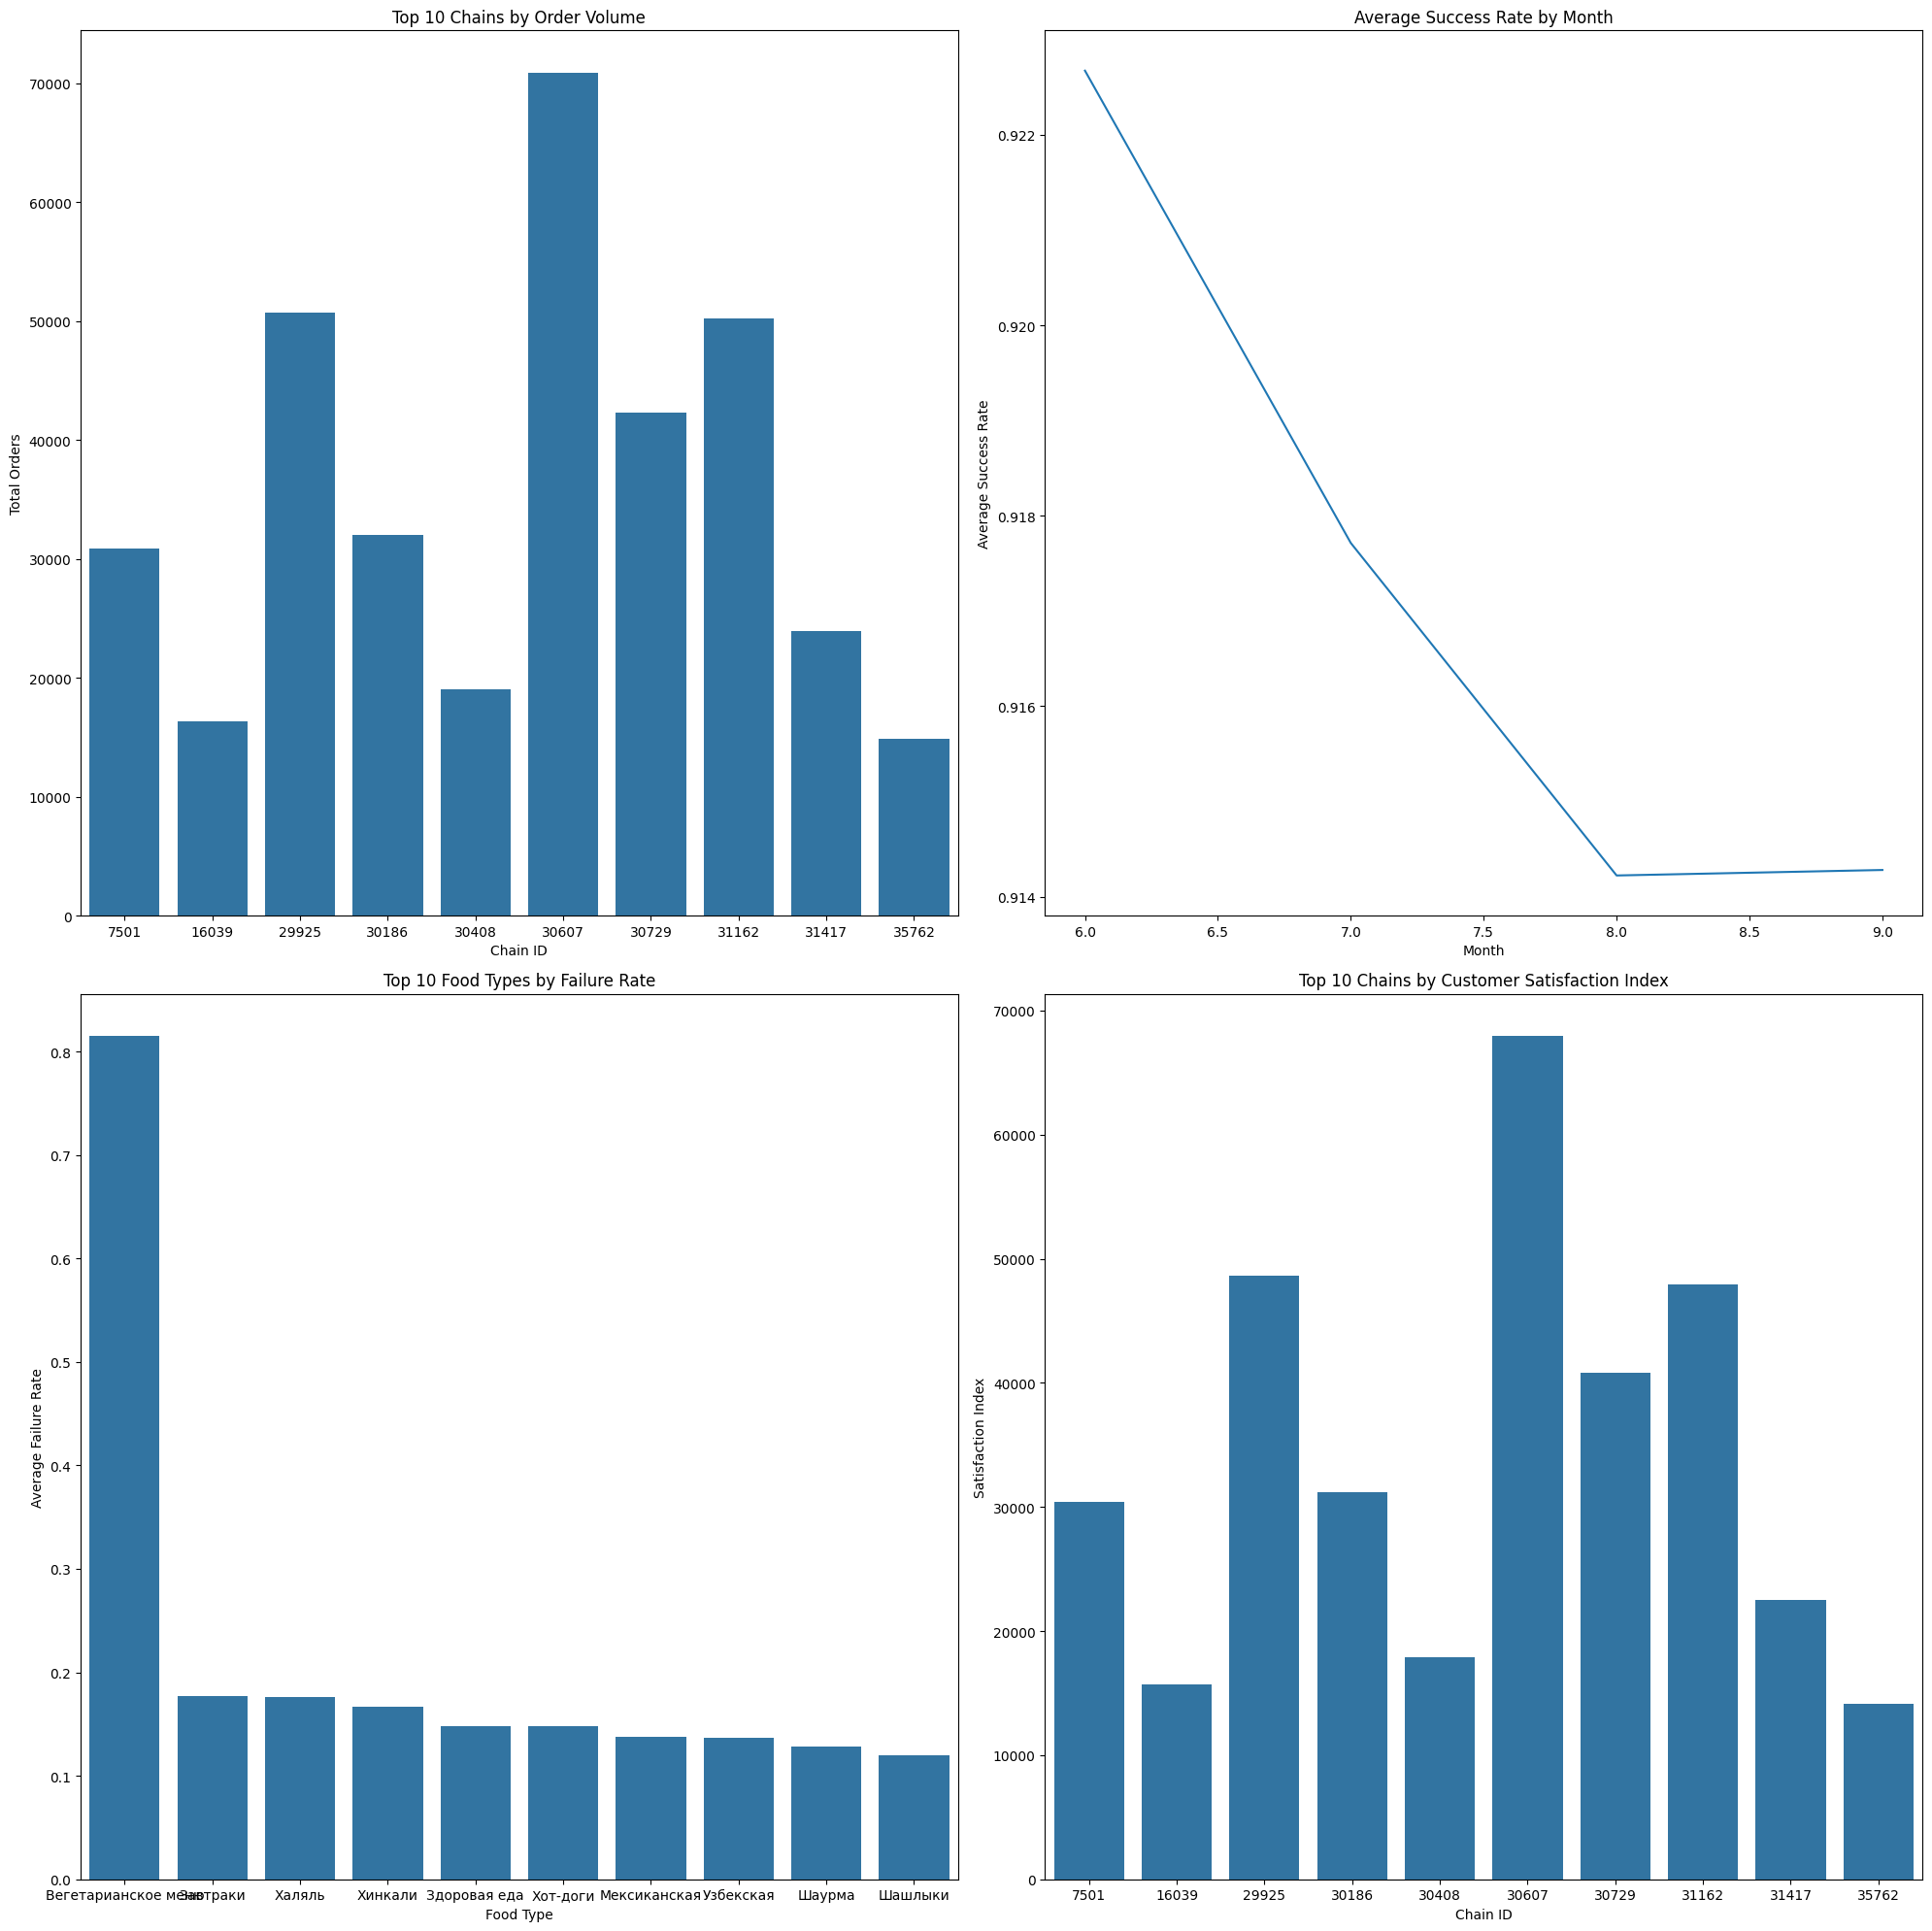

In [43]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Order Volume
sns.barplot(x=order_volume.head(10).index, y=order_volume.head(10).values, ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Chains by Order Volume')
axes[0, 0].set_xlabel('Chain ID')
axes[0, 0].set_ylabel('Total Orders')

# Monthly Performance
sns.lineplot(x=monthly_performance.index, y=monthly_performance.values, ax=axes[0, 1])
axes[0, 1].set_title('Average Success Rate by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Success Rate')

# Failure Rate by Food Type
sns.barplot(x=failure_analysis.head(10).index, y=failure_analysis.head(10).values, ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Food Types by Failure Rate')
axes[1, 0].set_xlabel('Food Type')
axes[1, 0].set_ylabel('Average Failure Rate')

# Customer Satisfaction Index
sns.barplot(x=satisfaction_index.head(10).index, y=satisfaction_index.head(10).values, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Chains by Customer Satisfaction Index')
axes[1, 1].set_xlabel('Chain ID')
axes[1, 1].set_ylabel('Satisfaction Index')

plt.tight_layout()
plt.show()

In [44]:
# Print some key insights
print("Top 5 Chains by Order Volume:")
print(order_volume.head())

print("\nTop 5 Cities by Performance:")
print(city_performance.head())

print("\nTop 5 Most Diverse Chains:")
print(diversity_score.head())

print("\nTop 5 Most Consistent Chains:")
print(consistency_score.head())

Top 5 Chains by Order Volume:
chain_id
30607    70890.0
29925    50730.0
31162    50251.0
30729    42331.0
30186    32052.0
Name: total_orders, dtype: float64

Top 5 Cities by Performance:
city_id
23    0.924284
25    0.924277
26    0.906474
24    0.905869
Name: success_rate, dtype: float64

Top 5 Most Diverse Chains:
chain_id
804      1
40552    1
40251    1
40258    1
40280    1
Name: spec, dtype: int64

Top 5 Most Consistent Chains:
chain_id
47907    0.0
30117    0.0
44776    0.0
44723    0.0
30361    0.0
Name: success_rate, dtype: float64


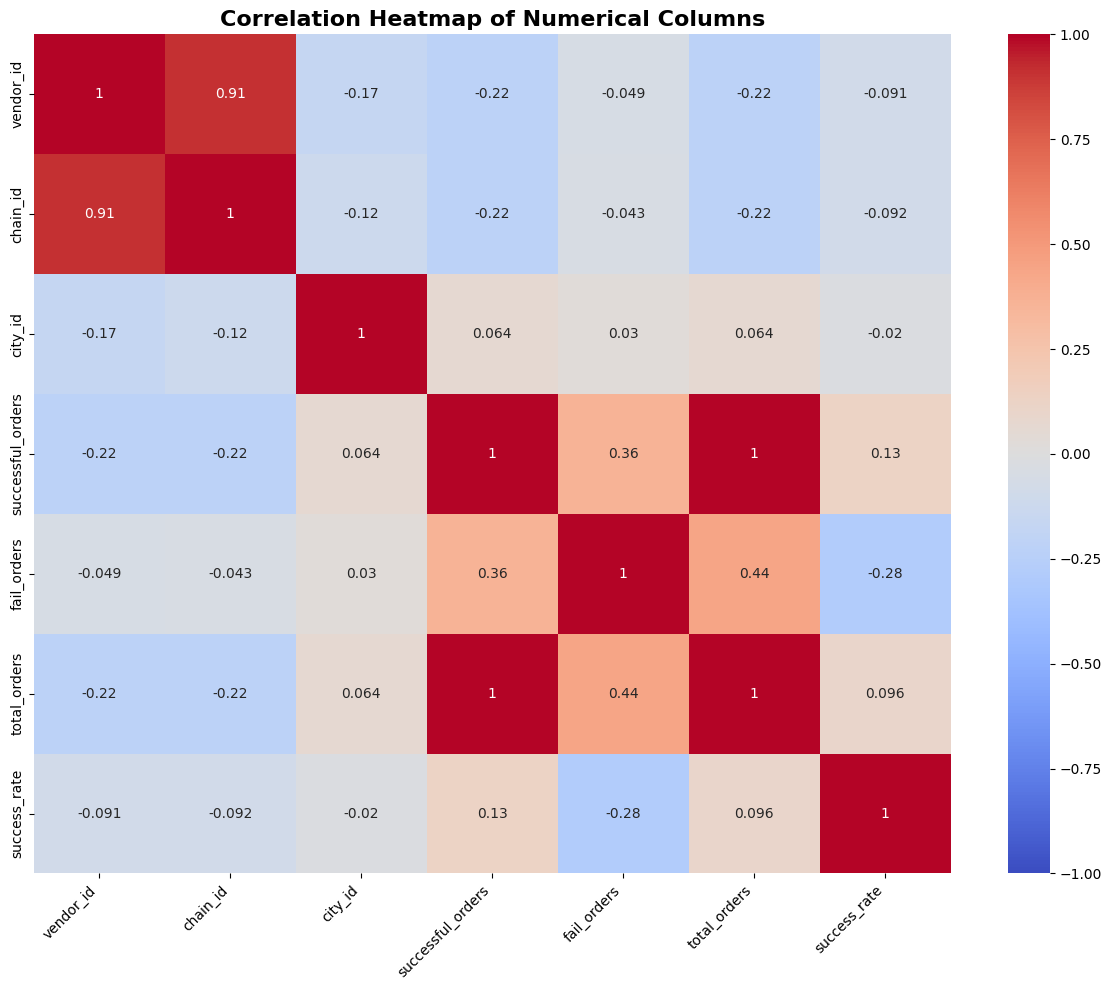


Correlation Matrix:
                   vendor_id  chain_id   city_id  successful_orders  \
vendor_id           1.000000  0.909312 -0.167171          -0.224571   
chain_id            0.909312  1.000000 -0.122913          -0.224652   
city_id            -0.167171 -0.122913  1.000000           0.063713   
successful_orders  -0.224571 -0.224652  0.063713           1.000000   
fail_orders        -0.048647 -0.042959  0.030485           0.364691   
total_orders       -0.220821 -0.220391  0.064140           0.996532   
success_rate       -0.091246 -0.092110 -0.019763           0.125459   

                   fail_orders  total_orders  success_rate  
vendor_id            -0.048647     -0.220821     -0.091246  
chain_id             -0.042959     -0.220391     -0.092110  
city_id               0.030485      0.064140     -0.019763  
successful_orders     0.364691      0.996532      0.125459  
fail_orders           1.000000      0.440905     -0.282819  
total_orders          0.440905      1.000000

In [45]:
# Select numerical columns
numerical_columns = ['vendor_id', 'chain_id', 'city_id', 'successful_orders', 'fail_orders', 'total_orders', 'success_rate']
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a figure and axis
plt.figure(figsize=(12, 10))

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Customize the plot
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

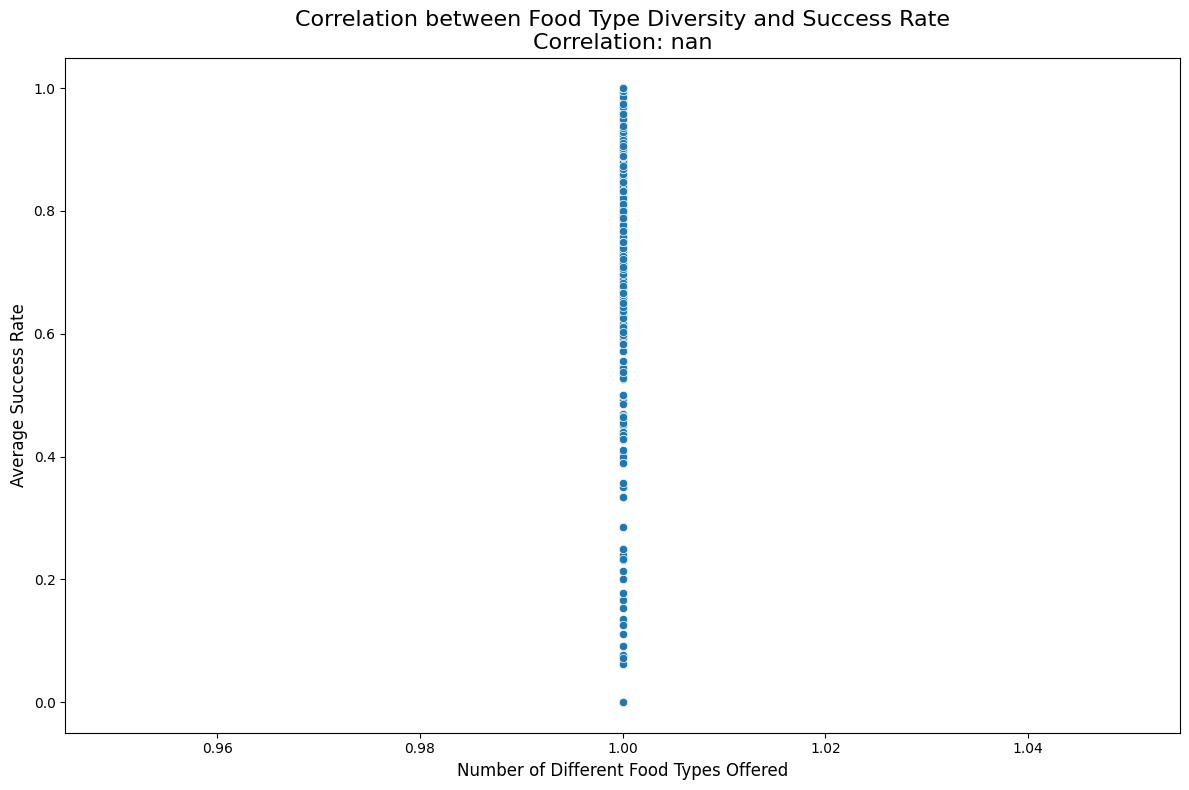

Top 10 chains by food type diversity:
     chain_id  food_type_count
0         804                1
714     40552                1
700     40251                1
701     40258                1
702     40280                1
703     40285                1
704     40289                1
705     40303                1
706     40305                1
707     40399                1

Top 10 chains by success rate:
      chain_id  success_rate
1062     47907           1.0
947      45349           1.0
190      28396           1.0
840      42849           1.0
851      43143           1.0
916      44723           1.0
917      44725           1.0
918      44776           1.0
139      26626           1.0
939      45209           1.0

Correlation between food type count and success rate: nan

Average success rate by diversity level:
  diversity_level  success_rate
0               1      0.804635
1               2           NaN
2             3-5           NaN
3            6-10           NaN
4        

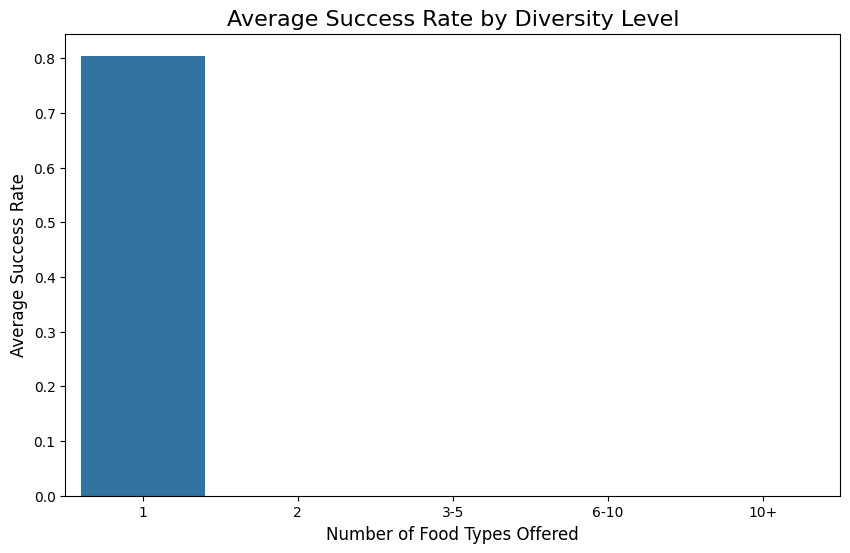

In [46]:
# Calculate how many different food types each chain offers
diversity = df.groupby('chain_id')['spec'].nunique().reset_index()
diversity.columns = ['chain_id', 'food_type_count']

# Calculate the overall success rate for each chain
success = df.groupby('chain_id')['success_rate'].mean().reset_index()

# Merge diversity and success data
analysis_df = pd.merge(diversity, success, on='chain_id')

# Calculate the correlation between food type count and success rate
correlation = analysis_df['food_type_count'].corr(analysis_df['success_rate'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='food_type_count', y='success_rate', data=analysis_df)

# Add a trend line
sns.regplot(x='food_type_count', y='success_rate', data=analysis_df, scatter=False, color='red')

plt.title(f'Correlation between Food Type Diversity and Success Rate\nCorrelation: {correlation:.2f}', fontsize=16)
plt.xlabel('Number of Different Food Types Offered', fontsize=12)
plt.ylabel('Average Success Rate', fontsize=12)

plt.tight_layout()
plt.show()

# Print some additional information
print("Top 10 chains by food type diversity:")
print(diversity.sort_values('food_type_count', ascending=False).head(10))

print("\nTop 10 chains by success rate:")
print(success.sort_values('success_rate', ascending=False).head(10))

print(f"\nCorrelation between food type count and success rate: {correlation:.2f}")

# Calculate average success rate for chains with different levels of diversity
analysis_df['diversity_level'] = pd.cut(analysis_df['food_type_count'], 
                                        bins=[0, 1, 2, 3, 5, float('inf')], 
                                        labels=['1', '2', '3-5', '6-10', '10+'])

diversity_success = analysis_df.groupby('diversity_level')['success_rate'].mean().reset_index()

print("\nAverage success rate by diversity level:")
print(diversity_success)

# Visualize average success rate by diversity level
plt.figure(figsize=(10, 6))
sns.barplot(x='diversity_level', y='success_rate', data=diversity_success)
plt.title('Average Success Rate by Diversity Level', fontsize=16)
plt.xlabel('Number of Food Types Offered', fontsize=12)
plt.ylabel('Average Success Rate', fontsize=12)
plt.show()

In [47]:
df.head(10)

,date,vendor_id,chain_id,city_id,spec,successful_orders,fail_orders,total_orders,success_rate,month,failure_rate,satisfaction_index
0,2019-07-02,40065,7501,23,Суши,54.0,1.0,55.0,0.9818,7,0.018182,53.9990
1,2019-08-27,48058,33226,23,Шаурма,0.0,0.0,0.0,0.0000,8,NaN,0.0000
2,2019-09-25,35430,26220,25,Пицца,2.0,0.0,2.0,1.0000,9,0.000000,2.0000
3,2019-09-21,56553,38601,23,Шашлыки,1.0,0.0,1.0,1.0000,9,0.000000,1.0000
4,2019-09-21,43919,30984,25,Суши,6.0,0.0,6.0,1.0000,9,0.000000,6.0000
5,2019-06-13,53006,36214,26,Грузинская,2.0,0.0,2.0,1.0000,6,0.000000,2.0000
6,2019-07-07,28982,20651,24,Суши,0.0,1.0,1.0,0.0000,7,1.000000,0.0000
7,2019-08-01,45472,30409,24,Бургеры,37.0,4.0,41.0,0.9024,8,0.097561,36.9984
8,2019-07-03,65358,43034,23,Русская,1.0,0.0,1.0,1.0000,7,0.000000,1.0000
9,2019-09-19,60878,41231,23,Русская,4.0,0.0,4.0,1.0000,9,0.000000,4.0000


Mean Squared Error: 0.03617140255651006
R-squared Score: 0.3253446542654794

Feature Importance:
        feature  importance
6  total_orders    0.271710
0     vendor_id    0.207505
1      chain_id    0.164532
5   day_of_week    0.162358
4         month    0.089867
3  spec_encoded    0.063934
2       city_id    0.040094


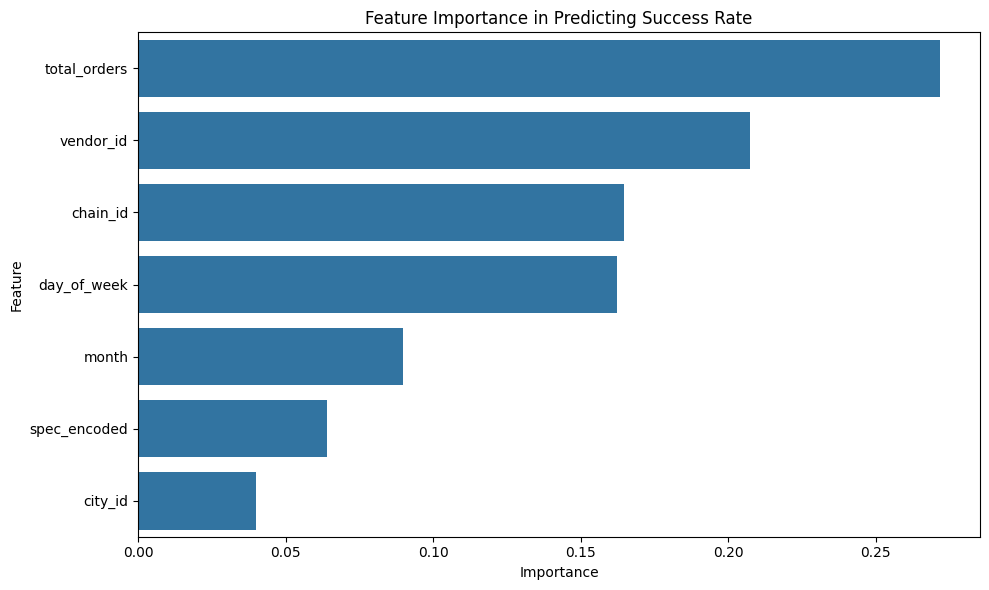

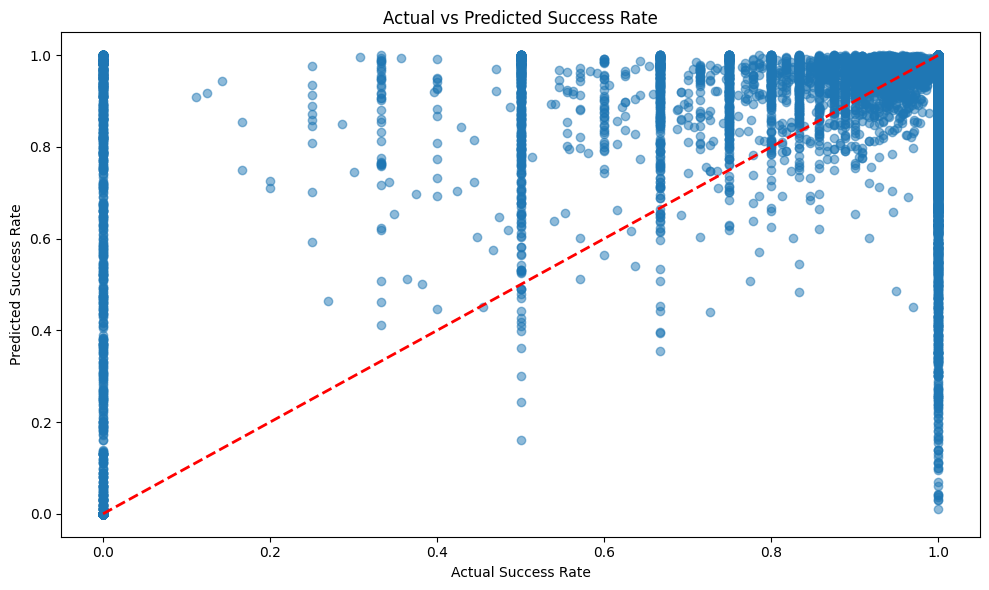


Example prediction:
Features: {'vendor_id': 48929.0, 'chain_id': 33759.0, 'city_id': 23.0, 'spec_encoded': 27.0, 'month': 6.0, 'day_of_week': 3.0, 'total_orders': 2.0}
Predicted Success Rate: 97.00%


c:\Users\rami bouraoui\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [48]:
#  useful features
df['day_of_week'] = df['date'].dt.dayofweek

# Create a LabelEncoder for 'spec' (food type)
le = LabelEncoder()
df['spec_encoded'] = le.fit_transform(df['spec'])

# Select features for the model
features = ['vendor_id', 'chain_id', 'city_id', 'spec_encoded', 'month', 'day_of_week', 'total_orders']
X = df[features]
y = df['success_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Success Rate')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Success Rate')
plt.ylabel('Predicted Success Rate')
plt.title('Actual vs Predicted Success Rate')
plt.tight_layout()
plt.show()

# Example prediction
example = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(example)
print(f"\nExample prediction:")
print(f"Features: {dict(zip(features, example[0]))}")
print(f"Predicted Success Rate: {prediction[0]:.2%}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mean Squared Error: 1.3941680575914908
R-squared Score: 0.993740871579601

Feature Importance:
         feature  importance
5   total_orders    0.997933
2  chain_encoded    0.000848
4    day_of_week    0.000398
3          month    0.000344
1   city_encoded    0.000275
0   spec_encoded    0.000201


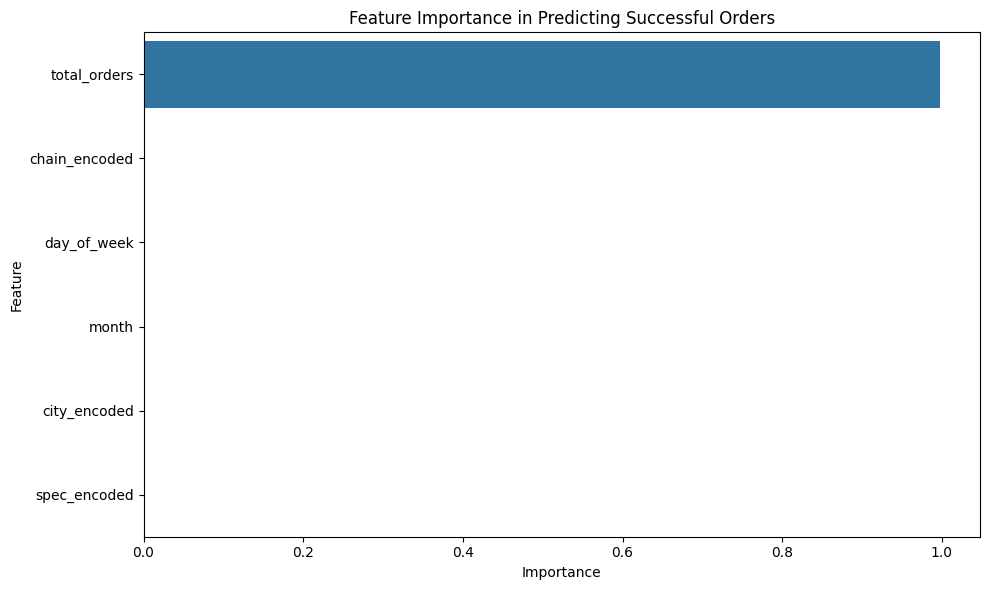

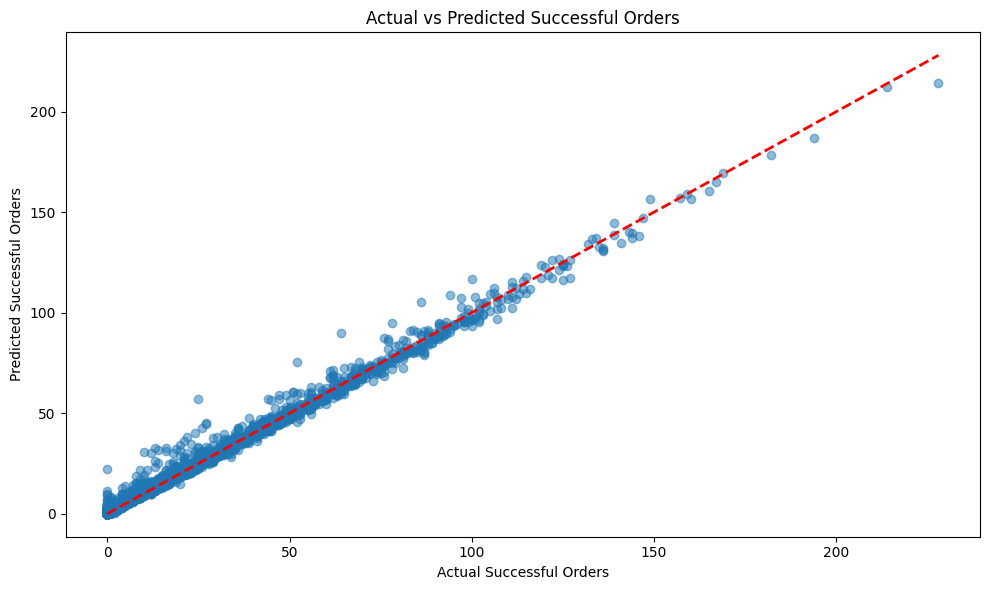

c:\Users\rami bouraoui\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Example prediction:
Spec: Пицца
City: 23
Chain: 7501
Month: 7
Day of week: 2
Total orders: 100
Predicted successful orders: 95.94

Average prediction error by spec:
spec
Вегетарианское меню   -0.715823
Хот-доги              -0.137556
Халяль                -0.137479
Завтраки              -0.099741
Здоровая еда          -0.093589
Узбекская             -0.040532
Русская               -0.040357
Хинкали               -0.038987
Выпечка               -0.030390
Индийская             -0.030066
Мексиканская          -0.024714
Шаурма                -0.023615
Сэндвичи              -0.022933
Бургеры               -0.019522
Пицца                 -0.013254
Корейская             -0.003547
Рыба                  -0.002428
Паста и ризотто       -0.001633
Шашлыки                0.001709
Мясо                   0.002283
Паназиатская           0.007968
Кофе и чай             0.009792
Десерты                0.010166
Японская               0.014591
Пироги                 0.019741
Фастфуд                0.0211

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create LabelEncoders for categorical variables
le_spec = LabelEncoder()
le_city = LabelEncoder()
le_chain = LabelEncoder()

df['spec_encoded'] = le_spec.fit_transform(df['spec'])
df['city_encoded'] = le_city.fit_transform(df['city_id'])
df['chain_encoded'] = le_chain.fit_transform(df['chain_id'])

# Select features for the model
features = ['spec_encoded', 'city_encoded', 'chain_encoded', 'month', 'day_of_week', 'total_orders']
X = df[features]
y = df['successful_orders']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create and train the model using GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Successful Orders')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Successful Orders')
plt.ylabel('Predicted Successful Orders')
plt.title('Actual vs Predicted Successful Orders')
plt.tight_layout()
plt.show()

# Function to predict successful orders for a given spec, city, and chain
def predict_successful_orders(spec, city, chain, month, day_of_week, total_orders):
    spec_encoded = le_spec.transform([spec])[0]
    city_encoded = le_city.transform([city])[0]
    chain_encoded = le_chain.transform([chain])[0]
    
    input_data = np.array([[spec_encoded, city_encoded, chain_encoded, month, day_of_week, total_orders]])
    prediction = best_model.predict(input_data)
    
    return prediction[0]

# Example prediction
example_spec = 'Пицца'
example_city = '23'
example_chain = '7501'
example_month = 7
example_day_of_week = 2
example_total_orders = 100

predicted_orders = predict_successful_orders(example_spec, example_city, example_chain, 
                                             example_month, example_day_of_week, example_total_orders)

print(f"\nExample prediction:")
print(f"Spec: {example_spec}")
print(f"City: {example_city}")
print(f"Chain: {example_chain}")
print(f"Month: {example_month}")
print(f"Day of week: {example_day_of_week}")
print(f"Total orders: {example_total_orders}")
print(f"Predicted successful orders: {predicted_orders:.2f}")

# Analyze performance by spec, city, and chain
df['predicted_successful_orders'] = best_model.predict(X)
df['prediction_error'] = df['successful_orders'] - df['predicted_successful_orders']

print("\nAverage prediction error by spec:")
print(df.groupby('spec')['prediction_error'].mean().sort_values())

print("\nAverage prediction error by city:")
print(df.groupby('city_id')['prediction_error'].mean().sort_values())

print("\nAverage prediction error by chain:")
print(df.groupby('chain_id')['prediction_error'].mean().sort_values())

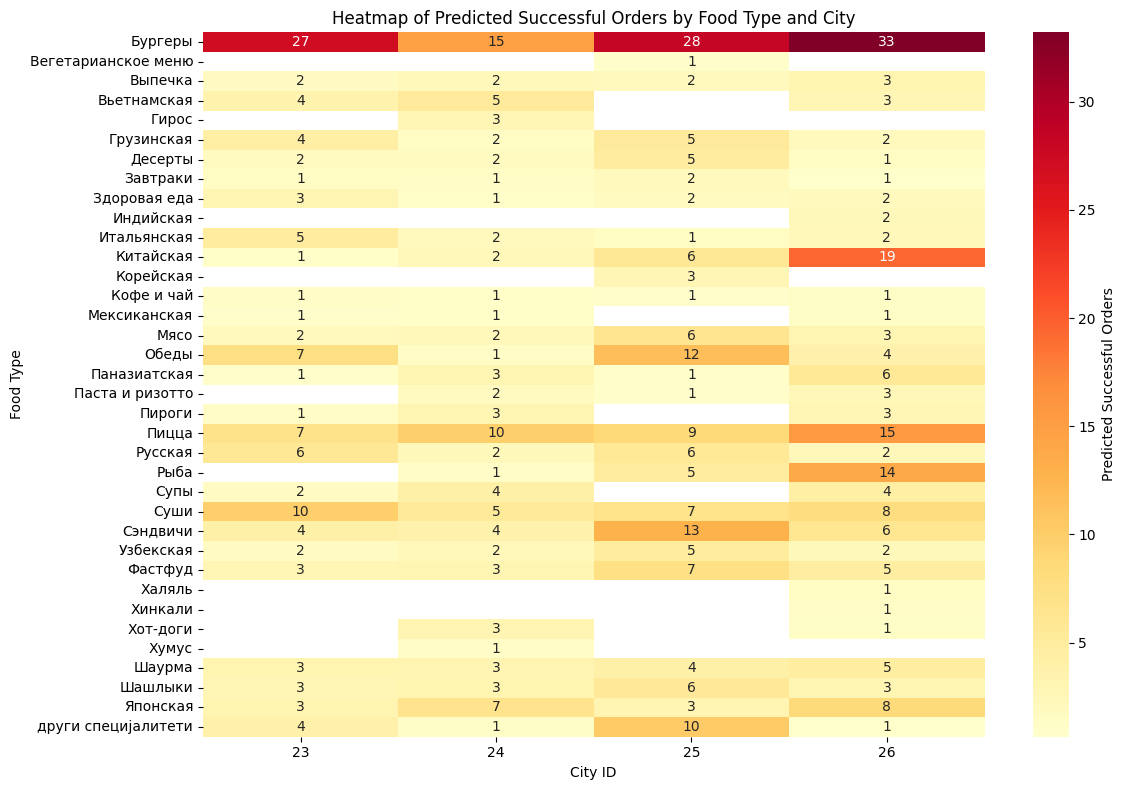

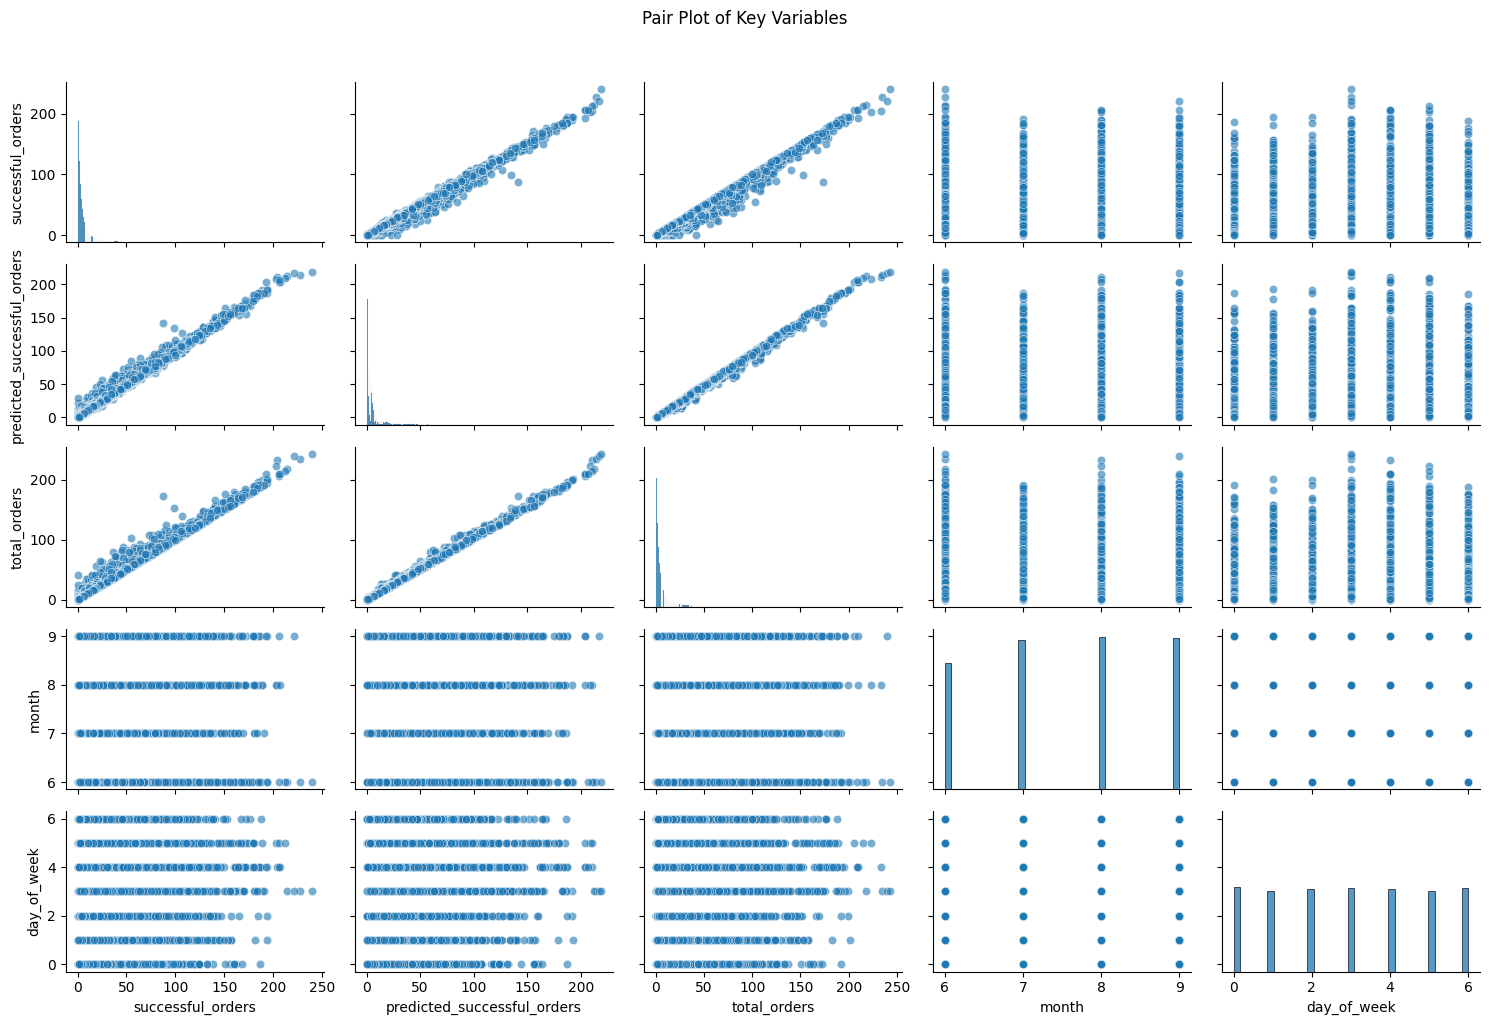

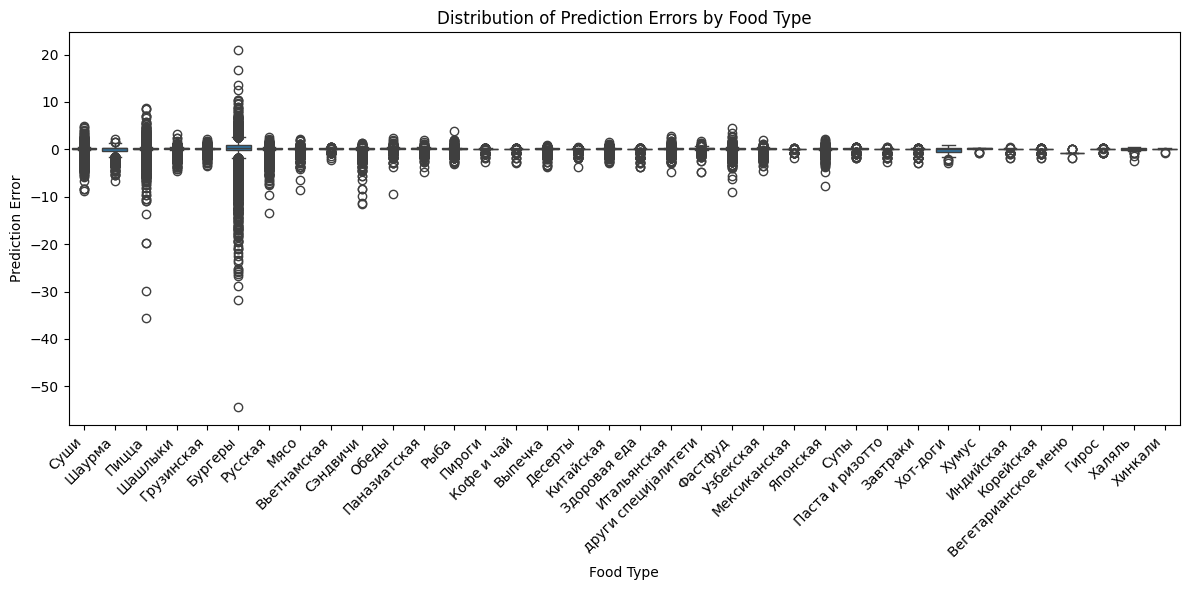

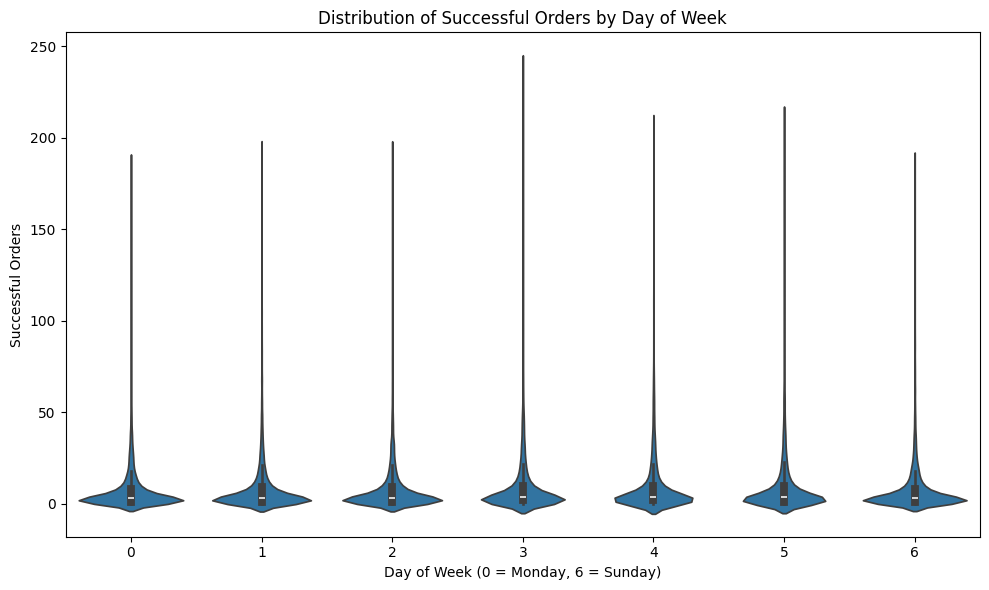

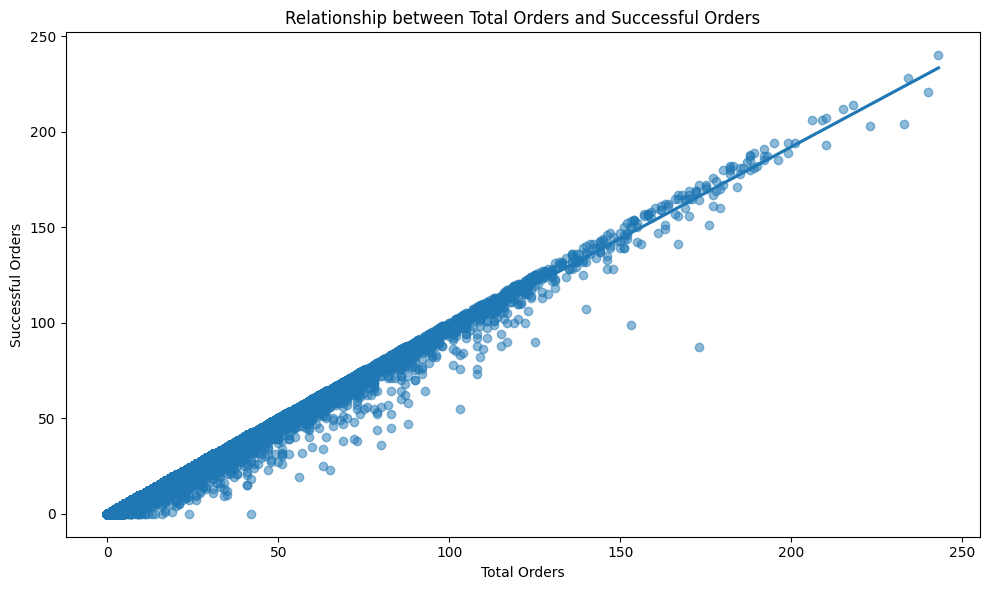

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code for data loading and model training remains the same)

# After model training and evaluation, add these new visualizations:

# 1. Heatmap of predicted successful orders by spec and city
pivot_pred = df.pivot_table(values='predicted_successful_orders', 
                            index='spec', 
                            columns='city_id', 
                            aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_pred, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Predicted Successful Orders'})
plt.title('Heatmap of Predicted Successful Orders by Food Type and City')
plt.xlabel('City ID')
plt.ylabel('Food Type')
plt.tight_layout()
plt.show()

# 2. Pair plot for key variables
pair_plot_data = df[['successful_orders', 'predicted_successful_orders', 'total_orders', 'month', 'day_of_week']]
sns.pairplot(pair_plot_data, height=2, aspect=1.5, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.tight_layout()
plt.show()

# 3. Box plot of prediction errors by food type
plt.figure(figsize=(12, 6))
sns.boxplot(x='spec', y='prediction_error', data=df)
plt.title('Distribution of Prediction Errors by Food Type')
plt.xlabel('Food Type')
plt.ylabel('Prediction Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Violin plot of successful orders by day of week
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='successful_orders', data=df)
plt.title('Distribution of Successful Orders by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Successful Orders')
plt.tight_layout()
plt.show()

# 5. Scatter plot with regression line for total orders vs successful orders
plt.figure(figsize=(10, 6))
sns.regplot(x='total_orders', y='successful_orders', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship between Total Orders and Successful Orders')
plt.xlabel('Total Orders')
plt.ylabel('Successful Orders')
plt.tight_layout()
plt.show()